In [1]:
import pandas as pd
import numpy as np

In [6]:
import pickle 
from matchms.importing.load_from_mgf import load_from_mgf
def load_pickled_file(filename: str):
    with open(filename, 'rb') as file:
        loaded_object = pickle.load(file)
    return loaded_object
true_values = load_pickled_file("../training_dec_2023/data/min_5_at_5_percent/positive_positive_true_values.pickle") 
predicted_values = load_pickled_file("../training_dec_2023/data/min_5_at_5_percent/positive_positive_predictions.pickle")
validation_spectra = list(load_from_mgf("../training_dec_2023/data/min_5_at_5_percent/positive_validation_spectra.mgf"))
print(true_values.shape)
print(predicted_values.shape)

(8778, 8778)
(8778, 8778)


In [7]:
from matplotlib import pyplot as plt

from ms2deepscore.wrapper_functions.plotting_wrapper_functions import sample_spectra_multiple_times, plot_stacked_histogram_plot_wrapper, plot_reversed_stacked_histogram_plot

def create_plots(validation_spectra, predicted_values, true_values):
    selected_predictions, selected_true_values = sample_spectra_multiple_times(val_spectra=validation_spectra,
                                                                               val_spectra_other_mode=validation_spectra,
                                                                               predicted_values=predicted_values,
                                                                               true_values=true_values,
                                                                               nr_of_sample_times=10)
    plot_stacked_histogram_plot_wrapper(ms2deepscore_predictions=selected_predictions,
                                        tanimoto_scores=selected_true_values, n_bins=10)
    plt.show()
    # Create reverse plot
    plot_reversed_stacked_histogram_plot(tanimoto_scores=selected_true_values,
                                         ms2deepscore_predictions=selected_predictions)
    plt.show()


# All vs All

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:21<00:00,  2.19s/it]


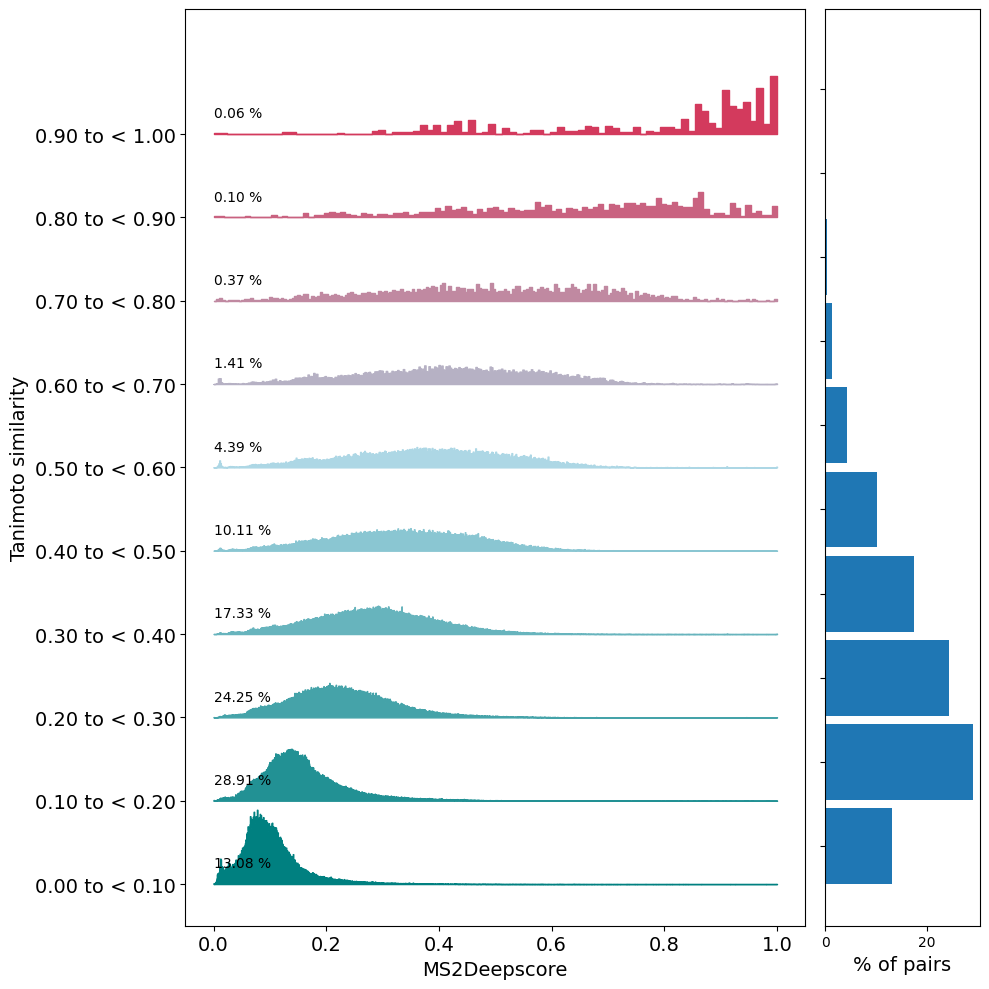

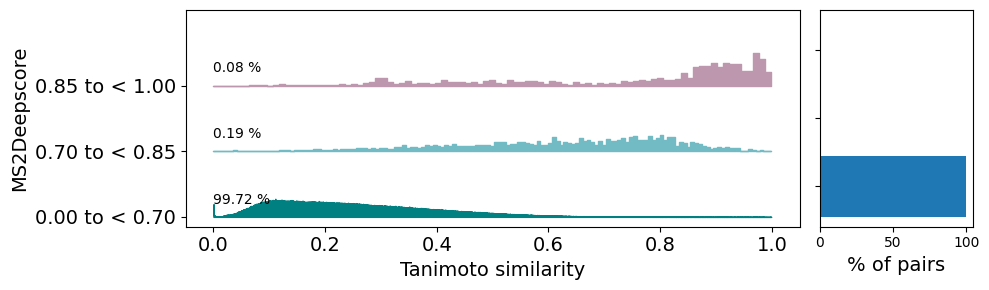

In [17]:
create_plots(validation_spectra, predicted_values, true_values)

# First 3000 

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:07<00:00,  1.32it/s]


One peak was too high, trying 802 bins
One peak was too high, trying 729 bins
One peak was too high, trying 662 bins
One peak was too high, trying 601 bins
One peak was too high, trying 546 bins


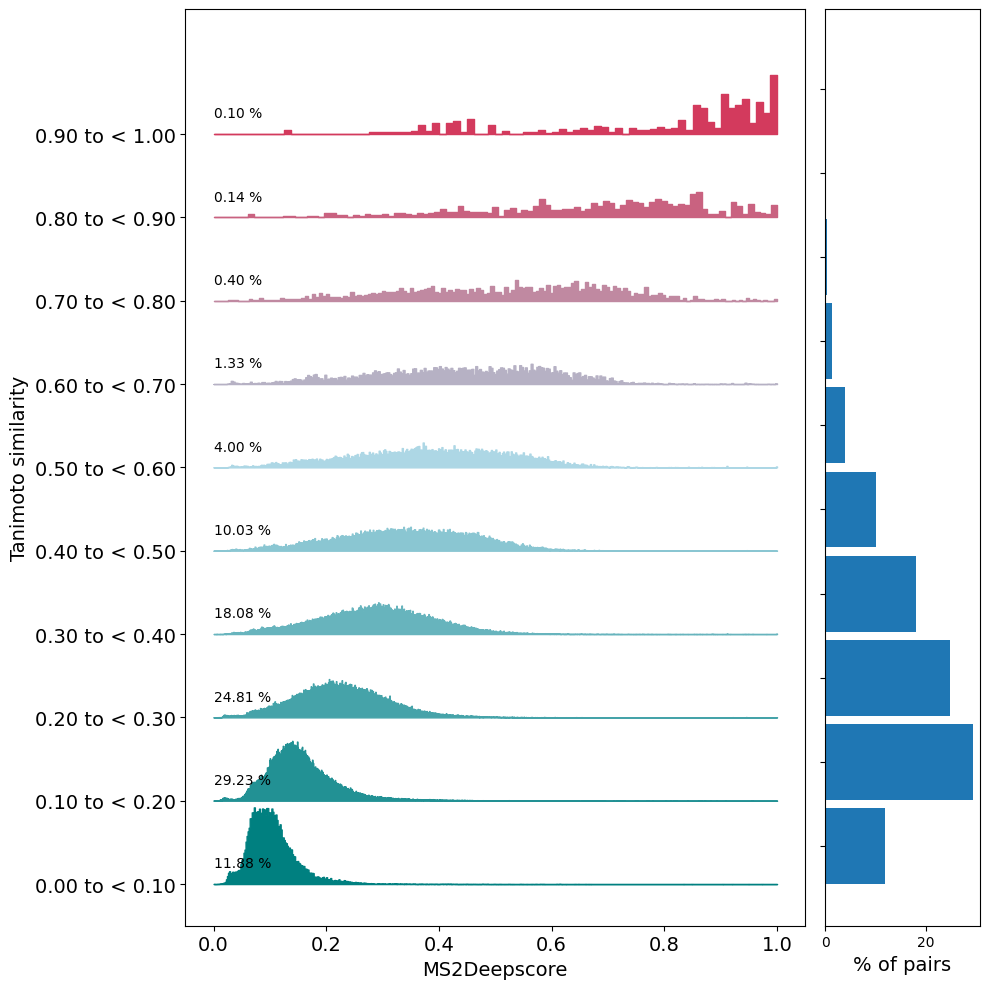

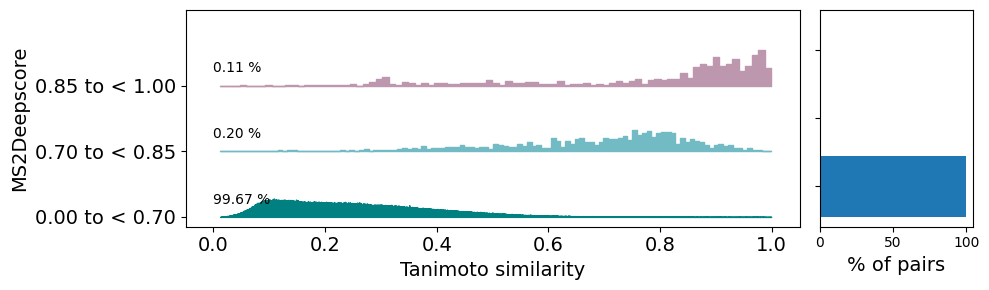

In [11]:
nr_of_spectra = 3000
create_plots(validation_spectra[:nr_of_spectra], 
             predicted_values[: nr_of_spectra, : nr_of_spectra], 
             true_values[: nr_of_spectra,: nr_of_spectra])


# Last 3000

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:06<00:00,  1.54it/s]


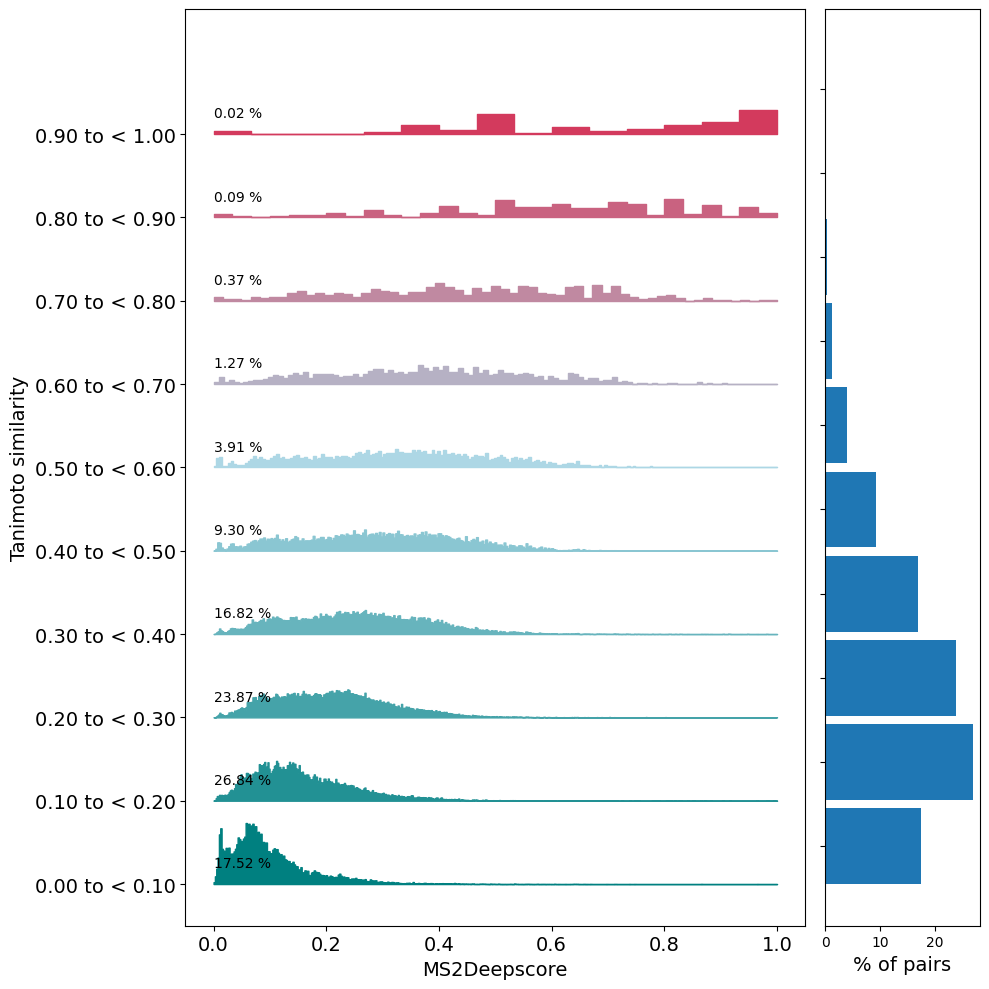

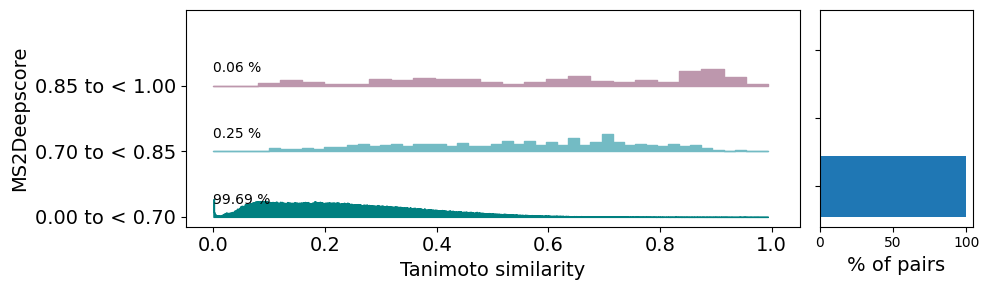

In [10]:
nr_of_spectra = 3000
create_plots(validation_spectra[-nr_of_spectra:], 
             predicted_values[-nr_of_spectra:, -nr_of_spectra:], 
             true_values[-nr_of_spectra:, -nr_of_spectra:])

# Compare inchikey score frequency

In [58]:
from collections import Counter

frequency_counter = Counter([spectrum.get("inchikey")[:14] for spectrum in validation_spectra])
inchikeys_sorted_on_frequency = [inchikey_pair[0] for inchikey_pair in frequency_counter.most_common()]

print(len(inchikeys_sorted_on_frequency))


1009


### Not used below but can be used to plot the exact matches. (These are filtered out for the same inchikey, so not very usefull...)

In [59]:
from ms2deepscore.visualize_results.plot_stacked_histogram import plot_stacked_histogram, calculate_all_histograms

def plot_with_separate_tanimoto_bin(validation_spectra, predicted_values, true_values):
    selected_predictions, selected_true_values = sample_spectra_multiple_times(val_spectra=validation_spectra,
                                                                               val_spectra_other_mode=validation_spectra,
                                                                               predicted_values=predicted_values,
                                                                               true_values=true_values,
                                                                               nr_of_sample_times=10)
    tanimoto_bins = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99, 1.001])
    
    normalized_counts_per_bin, used_ms2deepscore_bins_per_bin, percentage_of_total_pairs_per_bin = \
        calculate_all_histograms(selected_true_values, selected_predictions, tanimoto_bins,
                                 10)
    
    plot_stacked_histogram(normalized_counts_per_bin, used_ms2deepscore_bins_per_bin, percentage_of_total_pairs_per_bin,
                           tanimoto_bins, "MS2Deepscore", "Tanimoto similarity")

# Most common spectra

4757


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  2.99it/s]


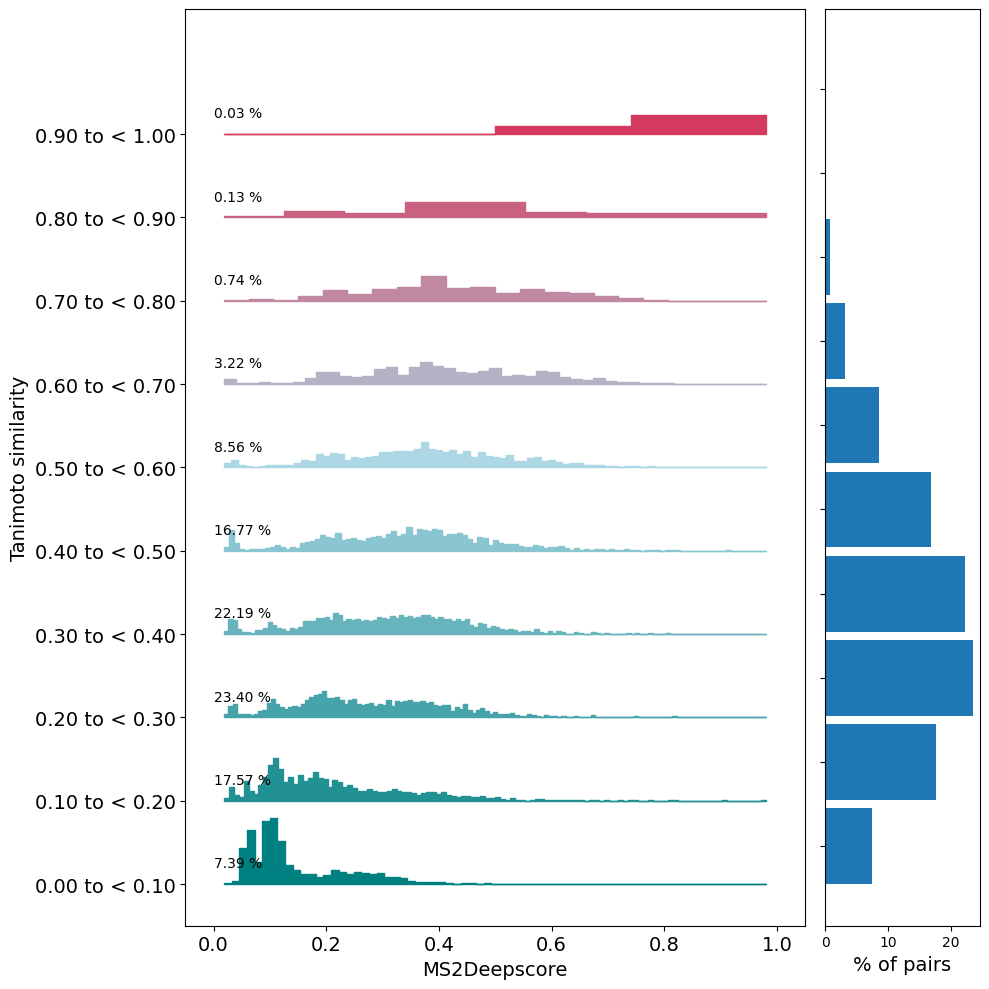

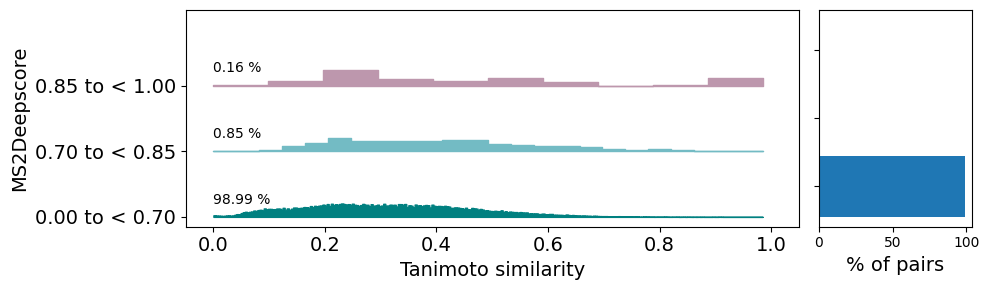

In [66]:
selected_inchikeys = sorted_on_how_common[:80]
indexes = []
selected_validation_spectra = []
for i, spectrum in enumerate(validation_spectra):
    inchikey = spectrum.get("inchikey")[:14]
    if inchikey in selected_inchikeys:
        selected_validation_spectra.append(spectrum)
        indexes.append(i)
print(len(selected_validation_spectra))

create_plots(selected_validation_spectra, 
             predicted_values[indexes, :][:, indexes], 
             true_values[indexes, :][:, indexes])

# Least common inchikeys

4021


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  1.76it/s]


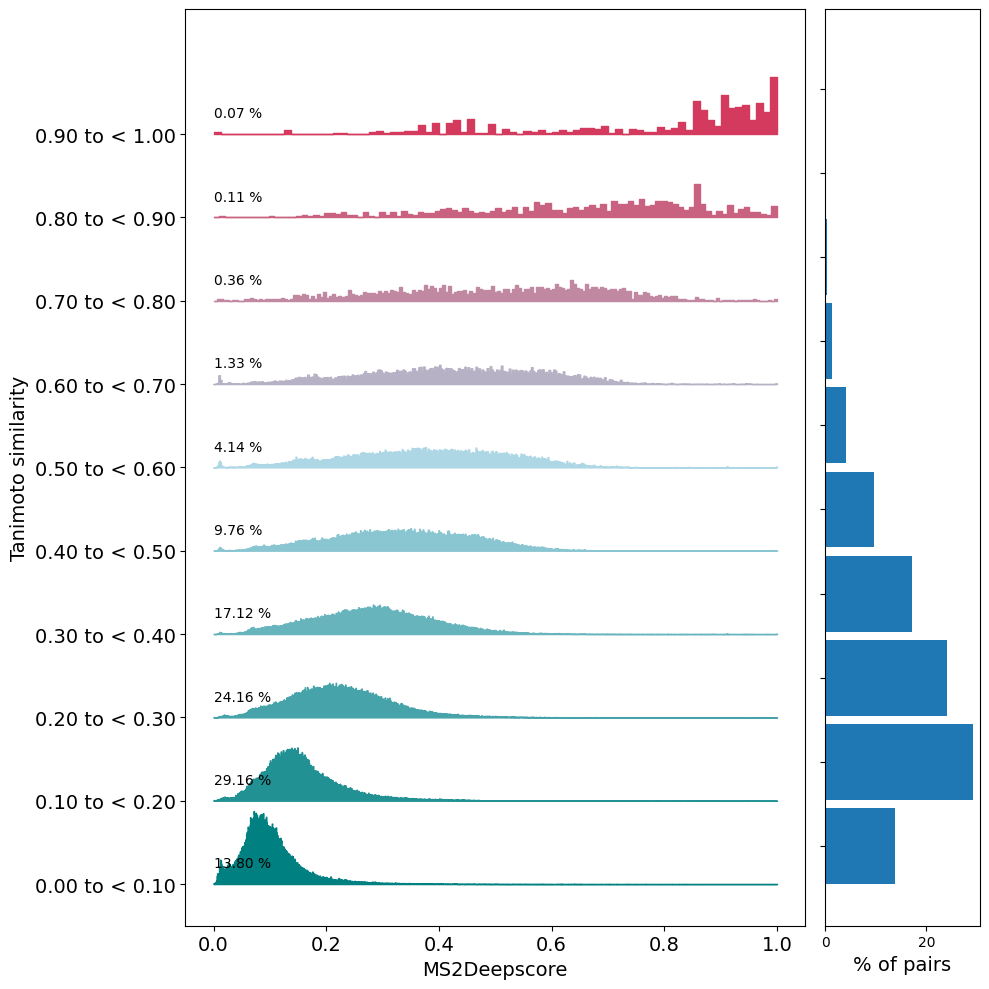

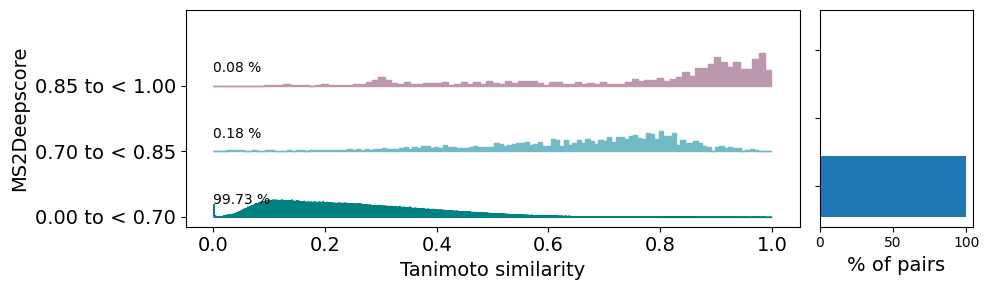

In [67]:
from ms2deepscore.visualize_results.plot_stacked_histogram import plot_stacked_histogram, calculate_all_histograms
selected_inchikeys = sorted_on_how_common[80:]
indexes = []
selected_validation_spectra = []
for i, spectrum in enumerate(validation_spectra):
    inchikey = spectrum.get("inchikey")[:14]
    if inchikey in selected_inchikeys:
        selected_validation_spectra.append(spectrum)
        indexes.append(i)
print(len(selected_validation_spectra))

create_plots(selected_validation_spectra, 
             predicted_values[indexes, :][:, indexes], 
             true_values[indexes, :][:, indexes])